In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
hw_aa = pd.read_csv('hw_aa.csv',sep=';')

In [3]:
hw_aa

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [ ]:
# Проведем А/А тест

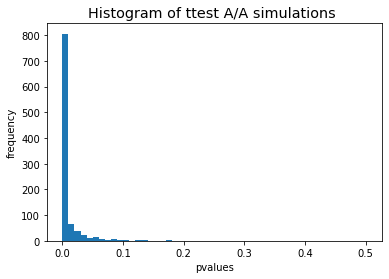

0.943

In [4]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[hw_aa.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = hw_aa[hw_aa.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# По результатам теста видим, что значение FPR = 0,9, что больше α=0,05. 
# Делаем вывод о том, что сплит-система работает некорректно и необходимо найти причины такой работы.

In [ ]:
# Посчитаем конверсию покупок приложения 

In [8]:
hw_aa_conversion = hw_aa.groupby(['experimentVariant','version'], as_index=False)\
     .agg({'purchase':'mean','Unnamed: 0':'count' })

In [9]:
hw_aa_conversion

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [ ]:
# Исходя из данных посчитанных выше посмотрим на конверсию покупки по версии приложения 
# и очень сильно конверсия отличается у версии v2.8.0 (у группы 0 конверсия меньше 1%, а у группы 1 - 5%)
# хотя по числу пользователей данные группы одинокавые.
# Можем сделать вывод, что ошибка, которая вызывает некорректную работу сплит-системы, находится именно в гуппах пользователей 
# данной версии приложения

In [10]:
# Посчитаем показатель pvalue для каждой версии приложения

In [12]:
v2_8_0 = hw_aa.query("version == 'v2.8.0'")

In [15]:
v2_8_0[v2_8_0.experimentVariant == 1]['purchase']

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
5,6,1679091c5a880faf6fb5e6087eb1b2dc,1,v2.8.0,0
7,8,c9f0f895fb98ab9159f51fd0297e236d,1,v2.8.0,0
...,...,...,...,...,...
127012,127013,2a6aecc2a058b72fb41dc7dbe4b25f75,0,v2.8.0,0
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [13]:
v2_9_0 = hw_aa.query("version == 'v2.9.0'")

In [14]:
v3_7_4_0 = hw_aa.query("version == 'v3.7.4.0'")

In [22]:
v3_8_0_0 = hw_aa.query("version == 'v3.8.0.0'")

In [24]:
# ttest для версии v2.8.0
stats.ttest_ind(v2_8_0[v2_8_0.experimentVariant == 1]['purchase'], v2_8_0[v2_8_0.experimentVariant == 0]['purchase'])


Ttest_indResult(statistic=42.963540840360324, pvalue=0.0)

In [17]:
# ttest для версии v2.9.0
stats.ttest_ind(v2_9_0[v2_9_0.experimentVariant == 1]['purchase'], v2_9_0[v2_9_0.experimentVariant == 0]['purchase'])


Ttest_indResult(statistic=-0.9979597634962479, pvalue=0.31830895167207446)

In [20]:
# ttest для версии v3.7.4.0
stats.ttest_ind(v3_7_4_0[v3_7_4_0.experimentVariant == 1]['purchase'], v3_7_4_0[v3_7_4_0.experimentVariant == 0]['purchase'])

Ttest_indResult(statistic=0.5874925850487471, pvalue=0.5568886771079735)

In [23]:
# ttest для версии v3.8.0.0
stats.ttest_ind(v3_8_0_0[v3_8_0_0.experimentVariant == 1]['purchase'], v3_8_0_0[v3_8_0_0.experimentVariant == 0]['purchase'])

Ttest_indResult(statistic=1.1956188950206779, pvalue=0.23186933664059722)

In [25]:
# Исходя из выше проведенных тестов мы видим, что показатель pvalue < 0.05 для версии приложения v2.8.0
# Попробуем исключить пользователей данной версии из эксперимента и провести А/А тестирование еще раз

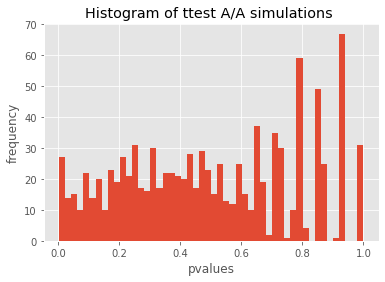

0.042

In [29]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# ТеперьБ когда показатель FPR = 0.04, можно сделать выовод: для того чтобы сплит-система работала корректно необходимо
# исключить пользователей v2.8.0 версии приложения.